In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdgal
plt.style.use('../../hsc-diffuse-galaxies/notebooks/jpg.mplstyle')

In [2]:
galex = pd.read_csv('../../hsc-diffuse-galaxies/paper/table-1-data/tab-1-galex.csv')
galex['id'] = [int(i.split('-')[-1]) for i in galex['id']]
galex.set_index('id', drop=True, inplace=True)

cat = pd.read_csv('../../hsc-diffuse-galaxies/data/final-sample/hsc-lsbg-final-cat.csv')
cat.drop('id', axis=1, inplace=True)
cat.rename(columns={'cat-id':'id'}, inplace=True)
cat.set_index('id', drop=True, inplace=True)

In [3]:
cat['ra_hr'] = cat['ra']/15.0
galex['ra_hr'] = galex['ra']/15.0

In [4]:
viz_cut = (galex.ra_hr > 4.0) | (galex.ra_hr < 1.0)

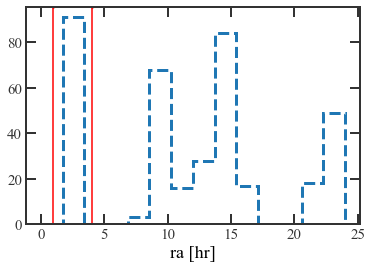

In [5]:
plt.hist(galex.ra_hr, range=[0,24], histtype='step', ls='--', lw=3, bins='auto')
plt.xlabel('ra [hr]')
plt.axvline(x=4, c='r')
plt.axvline(x=1, c='r');

In [6]:
targets = galex.loc[viz_cut].copy()
targets = targets.join(cat, how='left', rsuffix='cat_').copy()

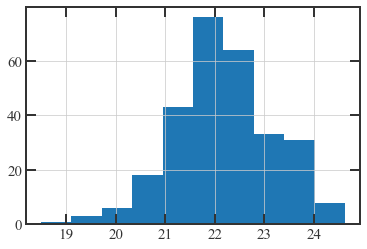

In [7]:
targets.nuv.hist();

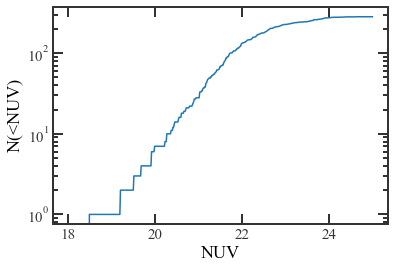

In [8]:
nuv_val = np.linspace(18, 25, 500)
cumnuv = [(targets.nuv<n).sum() for n in nuv_val]
plt.plot(nuv_val, cumnuv, '-')
plt.xlabel('NUV')
plt.ylabel('N(<NUV)')
plt.yscale('log');

In [9]:
nuv_cut = 21.5
n_cut = 5
r_e_cut = 5
mu_0_faint = 24.5
mu_0_bright = 25
cut = targets.nuv < nuv_cut
#cut &= targets.nuv < 21.5
cut &= targets.n < n_cut
cut &= targets.r_e > r_e_cut
cut &= targets.mu_0_forced_g > mu_0_faint
cut &= targets.mu_0_forced_g < mu_0_bright
objects = targets.loc[cut].copy()
objects.sort_values('nuv', inplace=True)
print(len(targets.loc[cut]))

6


In [10]:
print(objects[['nuv', 'mu_0_forced_g']])
hdgal.nbtools.display_group(objects['viz-id'], image_dir='../../udg-zoo/io/images/')

       nuv  mu_0_forced_g
id                       
741  20.27      24.841364
745  20.36      24.652373
575  20.70      24.649176
770  20.78      24.915992
515  21.20      24.895060
540  21.31      24.833912


In [490]:
ids = np.array([662, 522, 605, 40, 614, 741, 745, 515, 540, 497])

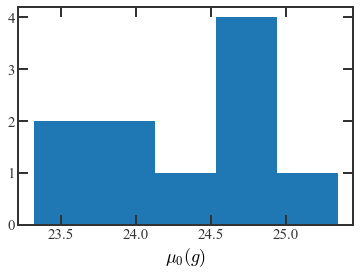

In [504]:
plt.hist(targets.loc[ids, 'mu_0_forced_g'], bins='auto')
plt.xlabel(r'$\mu_0(g)$')

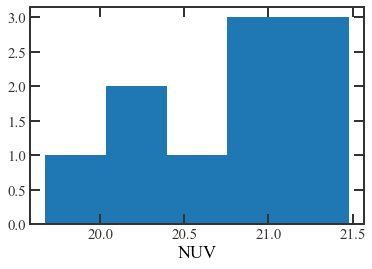

In [505]:
plt.hist(targets.loc[ids, 'nuv'], bins='auto')
plt.xlabel(r'NUV')

In [491]:
targets.loc[ids, 'viz-id']

id
662    1456
522    1174
605    1327
40       91
614    1346
741    1603
745    1611
515    1164
540    1201
497    1140
Name: viz-id, dtype: int64

In [492]:
hdgal.nbtools.display_group(targets.loc[ids, 'viz-id'], image_dir='../../udg-zoo/io/images/')

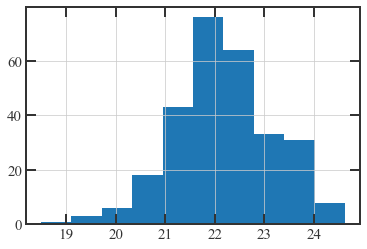

In [47]:
targets['nuv'].hist();